In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from scipy.sparse import dia_matrix
import pandas as pd
from qutip import *
import os
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
from functions import*


raw_data = np.loadtxt('mp-19426_CaWO4.xyz', dtype = str) # Tungsten atom positions in Amstrongs
elements = raw_data[:, 0]                     # strings, shape (N,)
pos = raw_data[:, 1:].astype(float)           # floats, shape (N,3)
Crystal_atoms = np.empty(len(elements), dtype=[("el", "U8"), ("xyz", float, (3,))])
Crystal_atoms["el"] = elements
Crystal_atoms["xyz"] = pos
Crystal_atoms["xyz"] -= np.array([2.667267, 2.667267, 0.000000]) # center at Er3+

W_pos = np.loadtxt('positions_ErW_CaWO4.txt') * 1e-10 # Tungsten atom positions in Amstrongs
W_atomes = Crystal_atoms[Crystal_atoms["el"] == "W"]
W_pos

array([[ 3.70729014e-10, -2.62145000e-10, -2.62145000e-10,
         0.00000000e+00],
       [ 3.70729014e-10, -2.62145000e-10,  2.62145000e-10,
         0.00000000e+00],
       [ 3.70729014e-10,  2.62145000e-10, -2.62145000e-10,
         0.00000000e+00],
       ...,
       [ 2.49262643e-09,  1.31072500e-09,  1.57287000e-09,
        -1.42171250e-09],
       [ 2.49262643e-09,  1.57287000e-09, -1.31072500e-09,
         1.42171250e-09],
       [ 2.49262643e-09,  1.57287000e-09,  1.31072500e-09,
         1.42171250e-09]])

In [2]:
W_atomes

array([('W', [-2.667267,  0.      ,  2.877477]),
       ('W', [ 2.667267,  0.      ,  2.877477]),
       ('W', [-2.667267, -2.667267,  0.      ]),
       ('W', [-2.667267, -2.667267, 11.50991 ]),
       ('W', [-2.667267,  2.667267,  0.      ]),
       ('W', [-2.667267,  2.667267, 11.50991 ]),
       ('W', [ 2.667267, -2.667267,  0.      ]),
       ('W', [ 2.667267, -2.667267, 11.50991 ]),
       ('W', [ 2.667267,  2.667267,  0.      ]),
       ('W', [ 2.667267,  2.667267, 11.50991 ]),
       ('W', [ 0.      , -2.667267,  8.632432]),
       ('W', [ 0.      ,  2.667267,  8.632432]),
       ('W', [ 0.      ,  0.      ,  5.754955])],
      dtype=[('el', '<U8'), ('xyz', '<f8', (3,))])

0.0 0.0


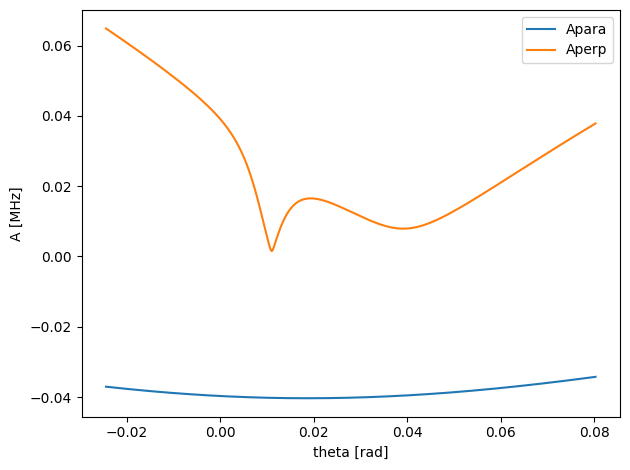

In [3]:



ay = -0.57 * np.pi / 180
ax = -0.7 * np.pi / 180

thetas =  1.6 /360*2*np.pi + np.linspace(-3,3,10000)*np.pi/180
phi_0 = 0.146 /360*2*np.pi
psi_0 = 0.368 /360*2*np.pi
index= 8
b0 = 436.917
# Plot_hyperFine_for_site(thetas,b0,W_atomes['xyz'][index] * 1e-10,atome='W',site_index=index)
Plot_hyperFine_for_site(thetas,b0,W_pos[2,1:],atome='W',site_index=index)


In [53]:
get_HyperFine(W_pos[9,1:],b0,theta,phi_0,psi_0)



NameError: name 'theta' is not defined